In [1]:
'''EXAMPLE FORMAT OF FOLDER STRUCTURE FOR TELEMETRY ANALYSIS'''

'EXAMPLE FORMAT OF FOLDER STRUCTURE FOR TELEMETRY ANALYSIS'

In [2]:
grand_prix = "Japan"
safety_car_laps = []  # a list in the form of ["SC_1_start-SC_2_end", "SC_2_start-SC_2_end"]
fastf1_dir = None  # if you have a fastf1 Cache folder, replace none with its string.
race = False

In [3]:
from data.race import race as f1r
from data.qualifying import qualifying as f1q
import fastf1 as f1

import plotly.express as px
import json
import pandas as pd

with open("../data/season_info.json") as file:
    season_info = json.loads(file.read())

teams = season_info["teams"]
team_colours = season_info["team_colours"]
tyre_colours = season_info["tyre_colours"]
drivers = season_info["drivers"]
races = season_info["races"]
current_race = races[grand_prix]

if fastf1_dir is not None:
    f1.Cache.enable_cache(fastf1_dir)
if race is True:
    identifier = "R"
else:
    identifier = "Q"
DATA = f1.get_session(year=2024, gp=grand_prix, identifier=identifier)
DATA.load()

initial_data = f1r.initial_setup(DATA, safety_car_laps)
sc_laps = initial_data["safety_car"]
all_laps_by_team = initial_data["team_laps"]

req         WARNING 	DEFAULT CACHE ENABLED! (1.49 GB) C:\Users\maxvo\AppData\Local\Temp\fastf1
core           INFO 	Loading data for Japanese Grand Prix - Qualifying [v3.3.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '4', '55', '14', '81', '44', '16', '63', '22', '3', '27', '77', '23', '31', '18', '10', '20', '2', '24']


core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
c:\Users\maxvo\AppData\Local\Programs\Python\Python312\Lib\site-packages\fastf1\utils.py:91: FutureWarning: `utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.
  warnings.warn("`utils.delta_time` is considered deprecated and will"


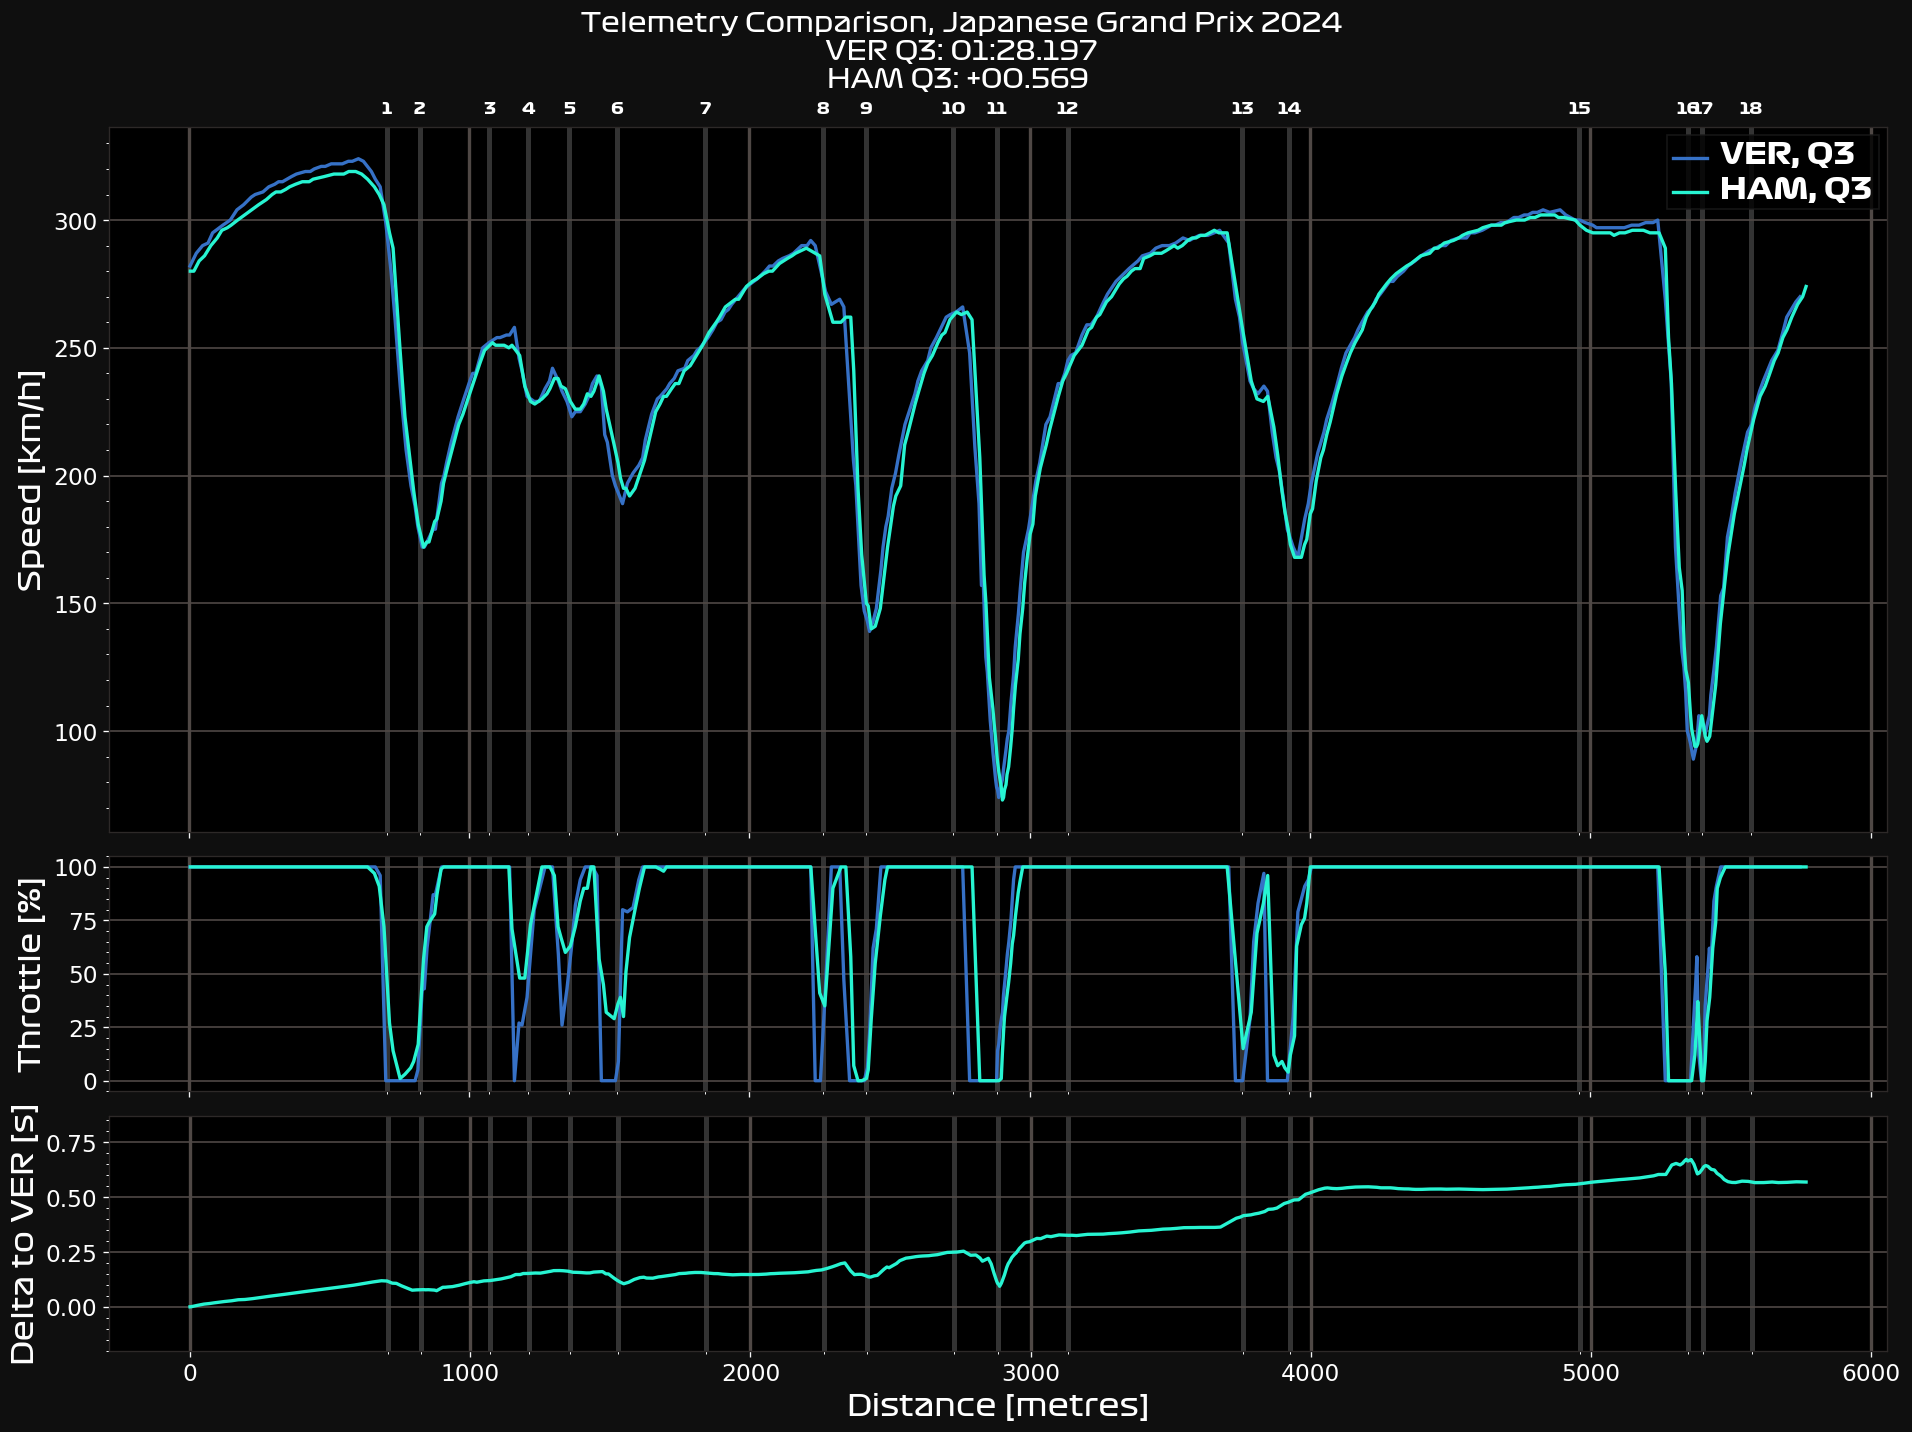

In [4]:
driver_info = [
    {
        "driver": "VER",
        "session": "Q3",
    },
    {
        "driver": "HAM",
        "session": "Q3",
        # "colour": "#FF0060"
    }
]

f1q.compare_telemetry(DATA, driver_info)

In [5]:
DATA_2023 = f1.get_session(year=2023, gp=grand_prix, identifier=identifier)
DATA_2023.load()

core           INFO 	Loading data for Japanese Grand Prix - Qualifying [v3.3.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '81', '4', '16', '11', '55', '44', '63', '22', '14', '40', '10', '23', '31', '20', '77', '18', '27', '24', '2']


core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
c:\Users\maxvo\AppData\Local\Programs\Python\Python312\Lib\site-packages\fastf1\utils.py:91: FutureWarning: `utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.
  warnings.warn("`utils.delta_time` is considered deprecated and will"


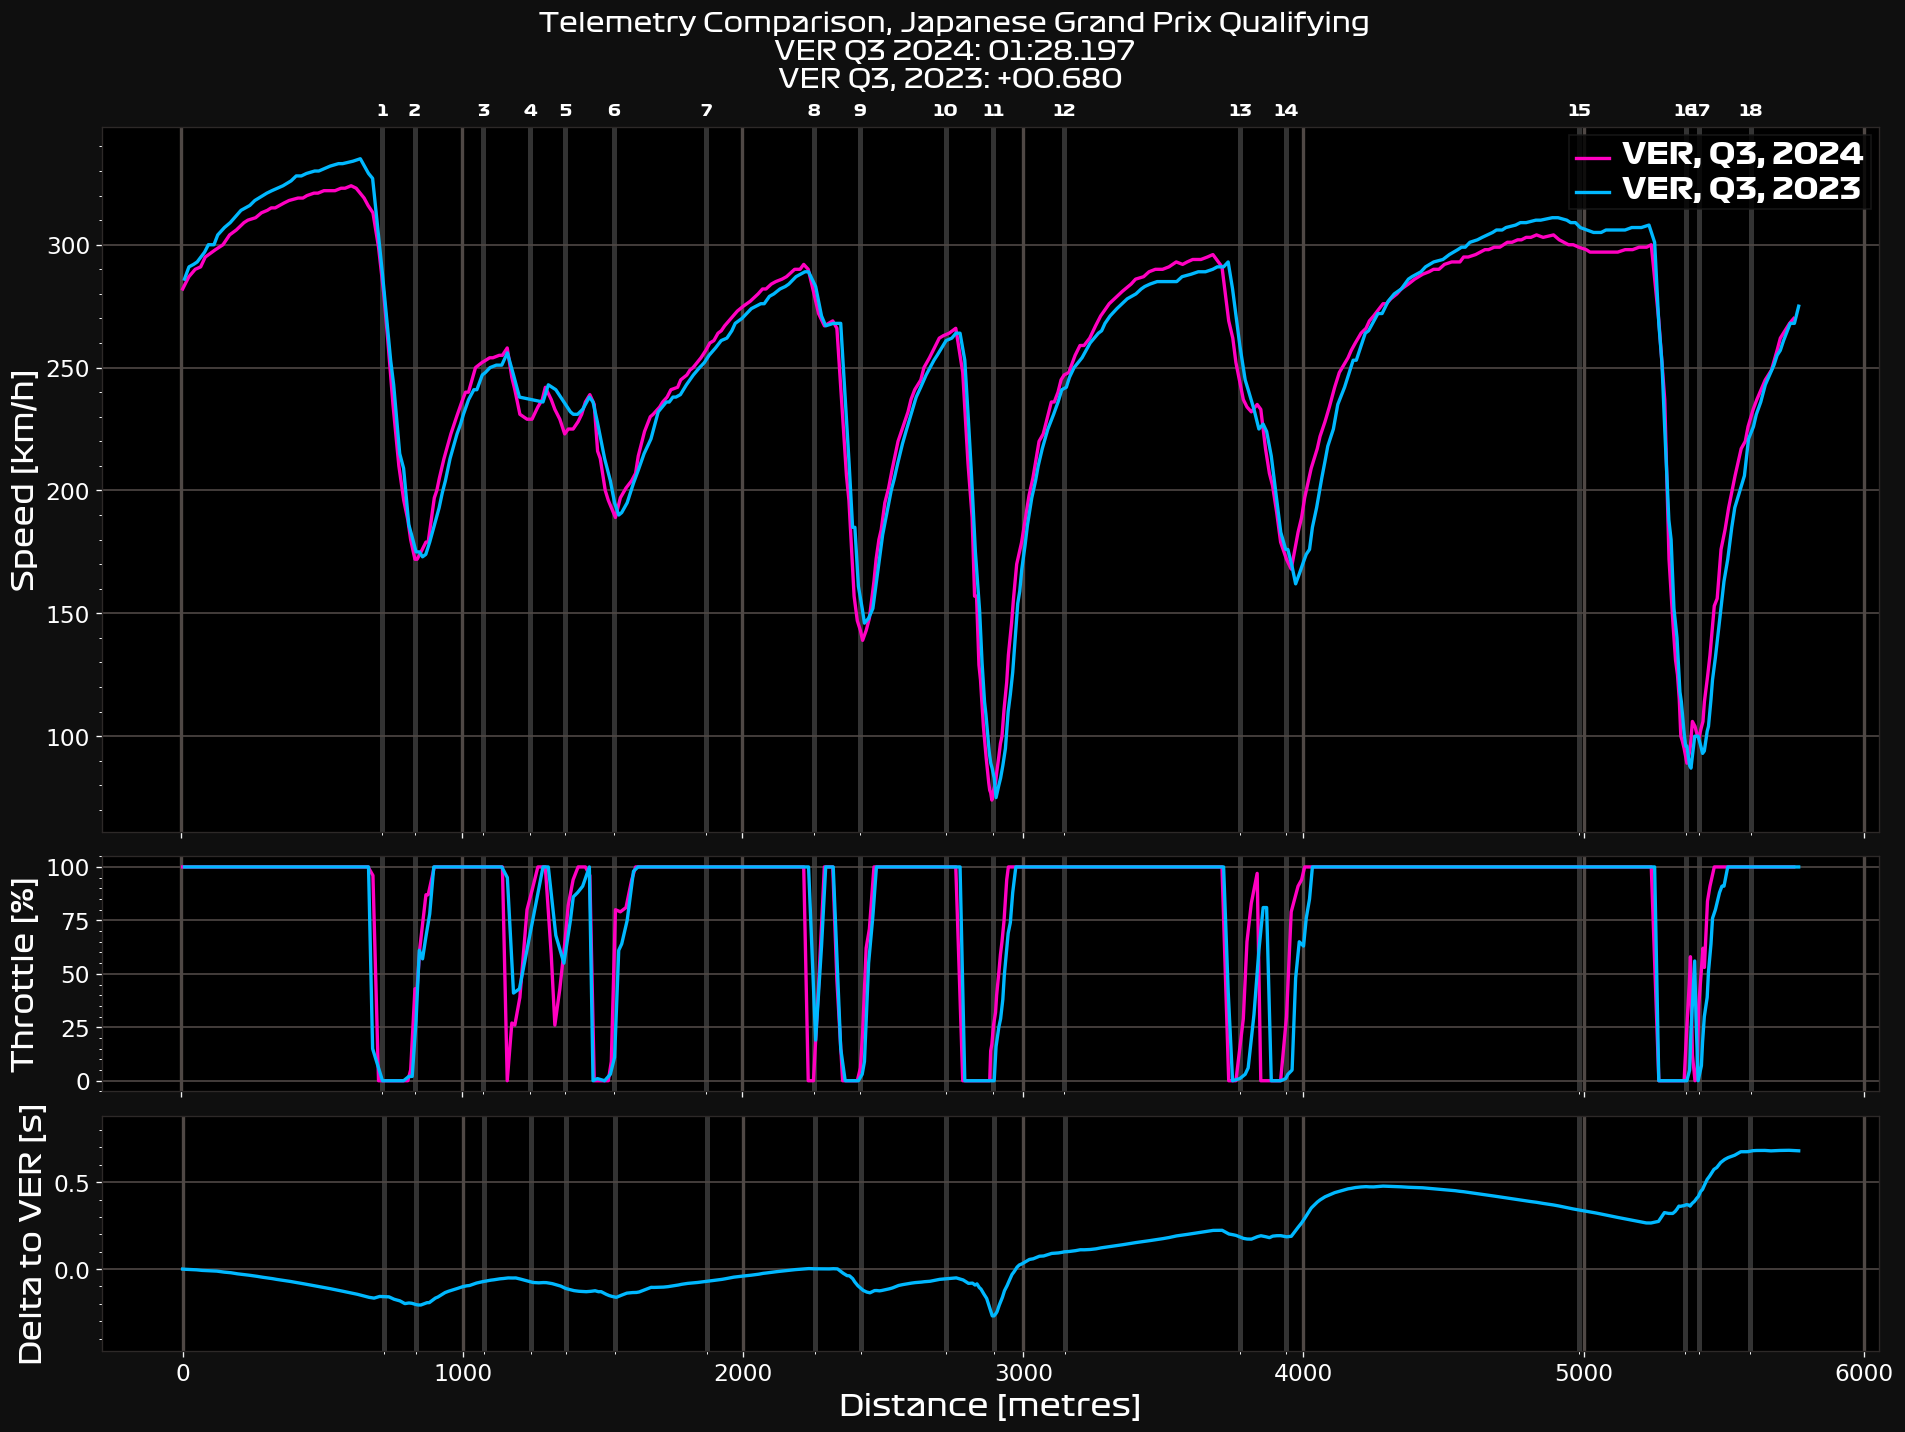

In [6]:
driver_info = [
    {
        "driver": "VER",
        "session": "Q3",
        "data": DATA,
        "colour": "#ff00c1"
    },
    {
        "driver": "VER",
        "session": "Q3",
        "data": DATA_2023,
        "colour": "#00b8ff"
    }
]

f1q.compare_telemetry_different_years(driver_info)

In [7]:
LAPS = DATA.laps
q1, q2, q3 = LAPS.split_qualifying_sessions()
LAPS_2023 = DATA_2023.laps
q1_2023, q2_2023, q3_2023 = LAPS_2023.split_qualifying_sessions()

In [8]:
last_year_comparison = dict()
previous_year_comparison = pd.DataFrame(columns=["Team", "LapTime2024", "LapTime2023", "Difference", "Session2024", "Session2023"])

for team in teams:
    session_2024 = "q3"
    session_2023 = "q3"


    fastest_2024 = q3.pick_team(team).pick_fastest()
    if pd.isna(fastest_2024["Time"]):
        fastest_2024 = q2.pick_team(team).pick_fastest()
        session_2024 = "q2"
        if pd.isna(fastest_2024["Time"]):
            fastest_2024 = q1.pick_team(team).pick_fastest()
            session_2024 = "q1"

    if team == "Kick Sauber": 
        team_2023 = "Alfa Romeo"
    elif team == "RB": 
        team_2023 = "AlphaTauri"
    else:
        team_2023 = team


    fastest_2023 = q3_2023.pick_team(team_2023).pick_fastest()
    if pd.isna(fastest_2023["Time"]):
        fastest_2023 = q2_2023.pick_team(team_2023).pick_fastest()
        session_2023 = "q2"
        if pd.isna(fastest_2023["Time"]):
            fastest_2023 = q1_2023.pick_team(team_2023).pick_fastest()
            session_2023 = "q1"

    difference = fastest_2023["LapTime"] - fastest_2024["LapTime"]
    session_2024_number = int(session_2024.split("q")[1])
    session_2023_number = int(session_2023.split("q")[1])
    session_difference = session_2024_number - session_2023_number


    new_row = {
        "Team": team,
        "LapTime2024": fastest_2024["LapTime"],
        "LapTime2023": fastest_2023["LapTime"],
        "Difference": difference,
        "Session2024": session_2024,
        "Session2023": session_2023,
        "SessionDifference": session_difference
    }

    previous_year_comparison = pd.concat([previous_year_comparison, pd.DataFrame([new_row])], ignore_index=True)
previous_year_comparison["Difference"] = previous_year_comparison["Difference"].dt.total_seconds()
previous_year_comparison = previous_year_comparison.sort_values(by="Difference", ascending=False)

C:\Users\maxvo\AppData\Local\Temp\ipykernel_26676\3338987517.py:49: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  previous_year_comparison = pd.concat([previous_year_comparison, pd.DataFrame([new_row])], ignore_index=True)
c:\Users\maxvo\AppData\Local\Programs\Python\Python312\Lib\site-packages\fastf1\core.py:3063: FutureWarning: In the future, `None` will be returned instead of an empty `Lap` object when there are no laps that satisfy the definition for fastest lap.
  warnings.warn(("In the future, `None` will be returned instead of "
c:\Users\maxvo\AppData\Local\Programs\Python\Python312\Lib\site-packages\fastf1\core.py:3063: FutureWarning: In the future, `None` will be returned instead of an empty `Lap` object when there are no laps that

In [9]:
fig = px.bar(
    previous_year_comparison, x="Team", y="Difference",
    template="plotly_dark",
    title="Japanese Grand Prix Qualifying Improvement, 2023 to 2024",
    labels={"Difference": "Time Gained to 2023 (seconds)"},
    width=1600, height=800,
    color="Team",
    color_discrete_map=team_colours
)
custom_font_family = "Open Sans, sans-serif"
fig.update_layout(
    font=dict(size=18),
    annotations=[
        dict(
            x=0, y=1.05,
            xref="paper", yref="paper",
            text="Fastest Lap 2024 vs. Fastest Lap 2023",
            font=dict(size=18, family=custom_font_family),
            showarrow=False,
            align="left"
        )
    ]   
)
fig.update_xaxes(title="")
fig.update_traces(showlegend=False)

fig.show()

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
c:\Users\maxvo\AppData\Local\Programs\Python\Python312\Lib\site-packages\fastf1\utils.py:91: FutureWarning:

`utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.



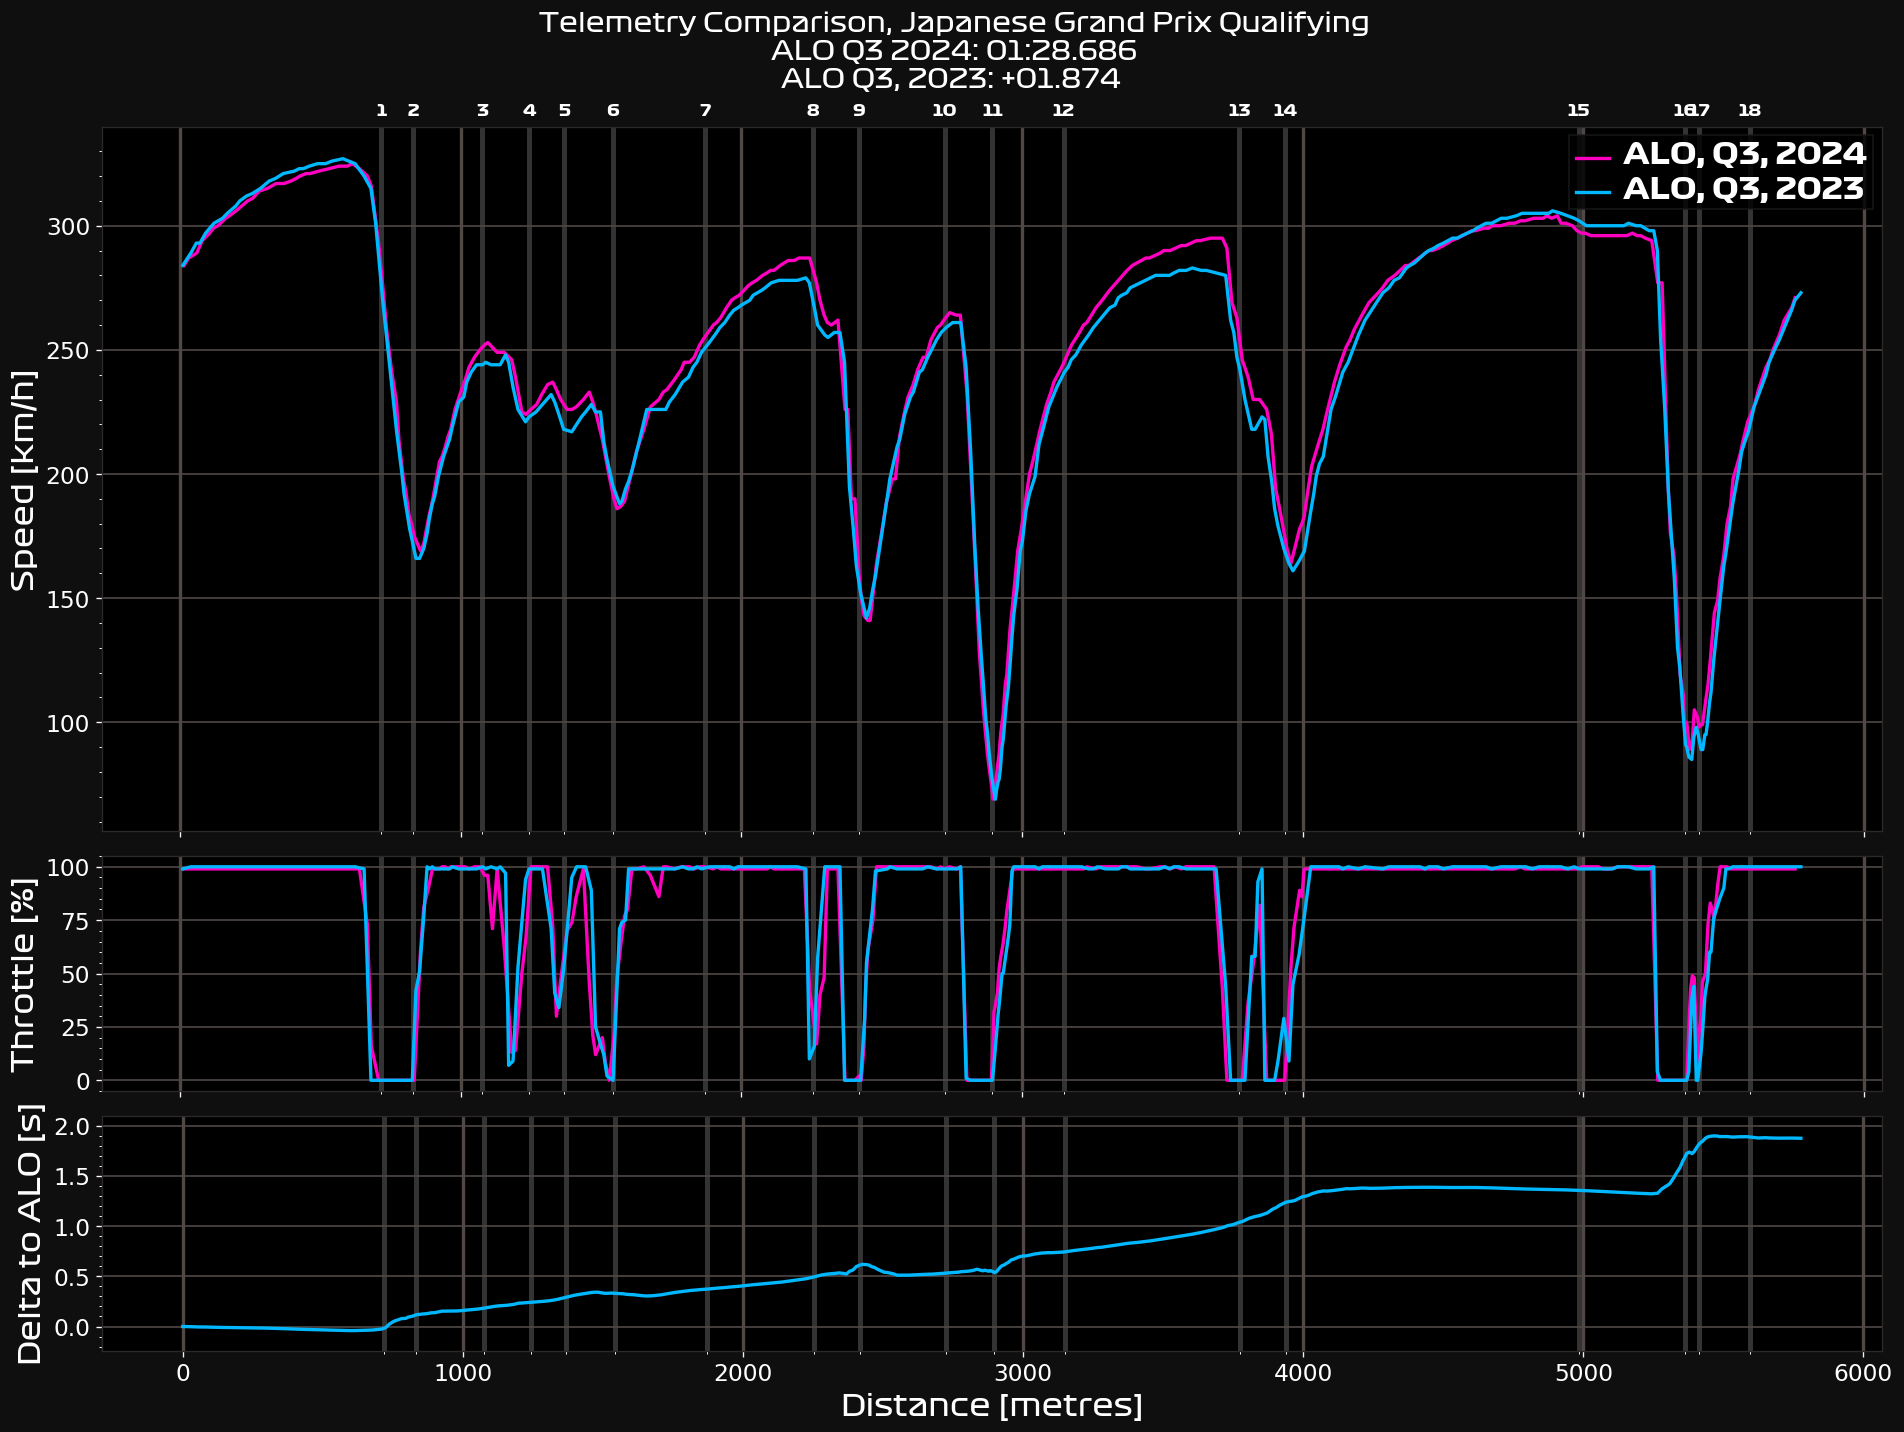

In [10]:
driver_info = [
    {
        "driver": "ALO",
        "session": "Q3",
        "data": DATA,
        "colour": "#ff00c1"
    },
    {
        "driver": "ALO",
        "session": "Q3",
        "data": DATA_2023,
        "colour": "#00b8ff"
    }
]

f1q.compare_telemetry_different_years(driver_info)

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
c:\Users\maxvo\AppData\Local\Programs\Python\Python312\Lib\site-packages\fastf1\utils.py:91: FutureWarning:

`utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.



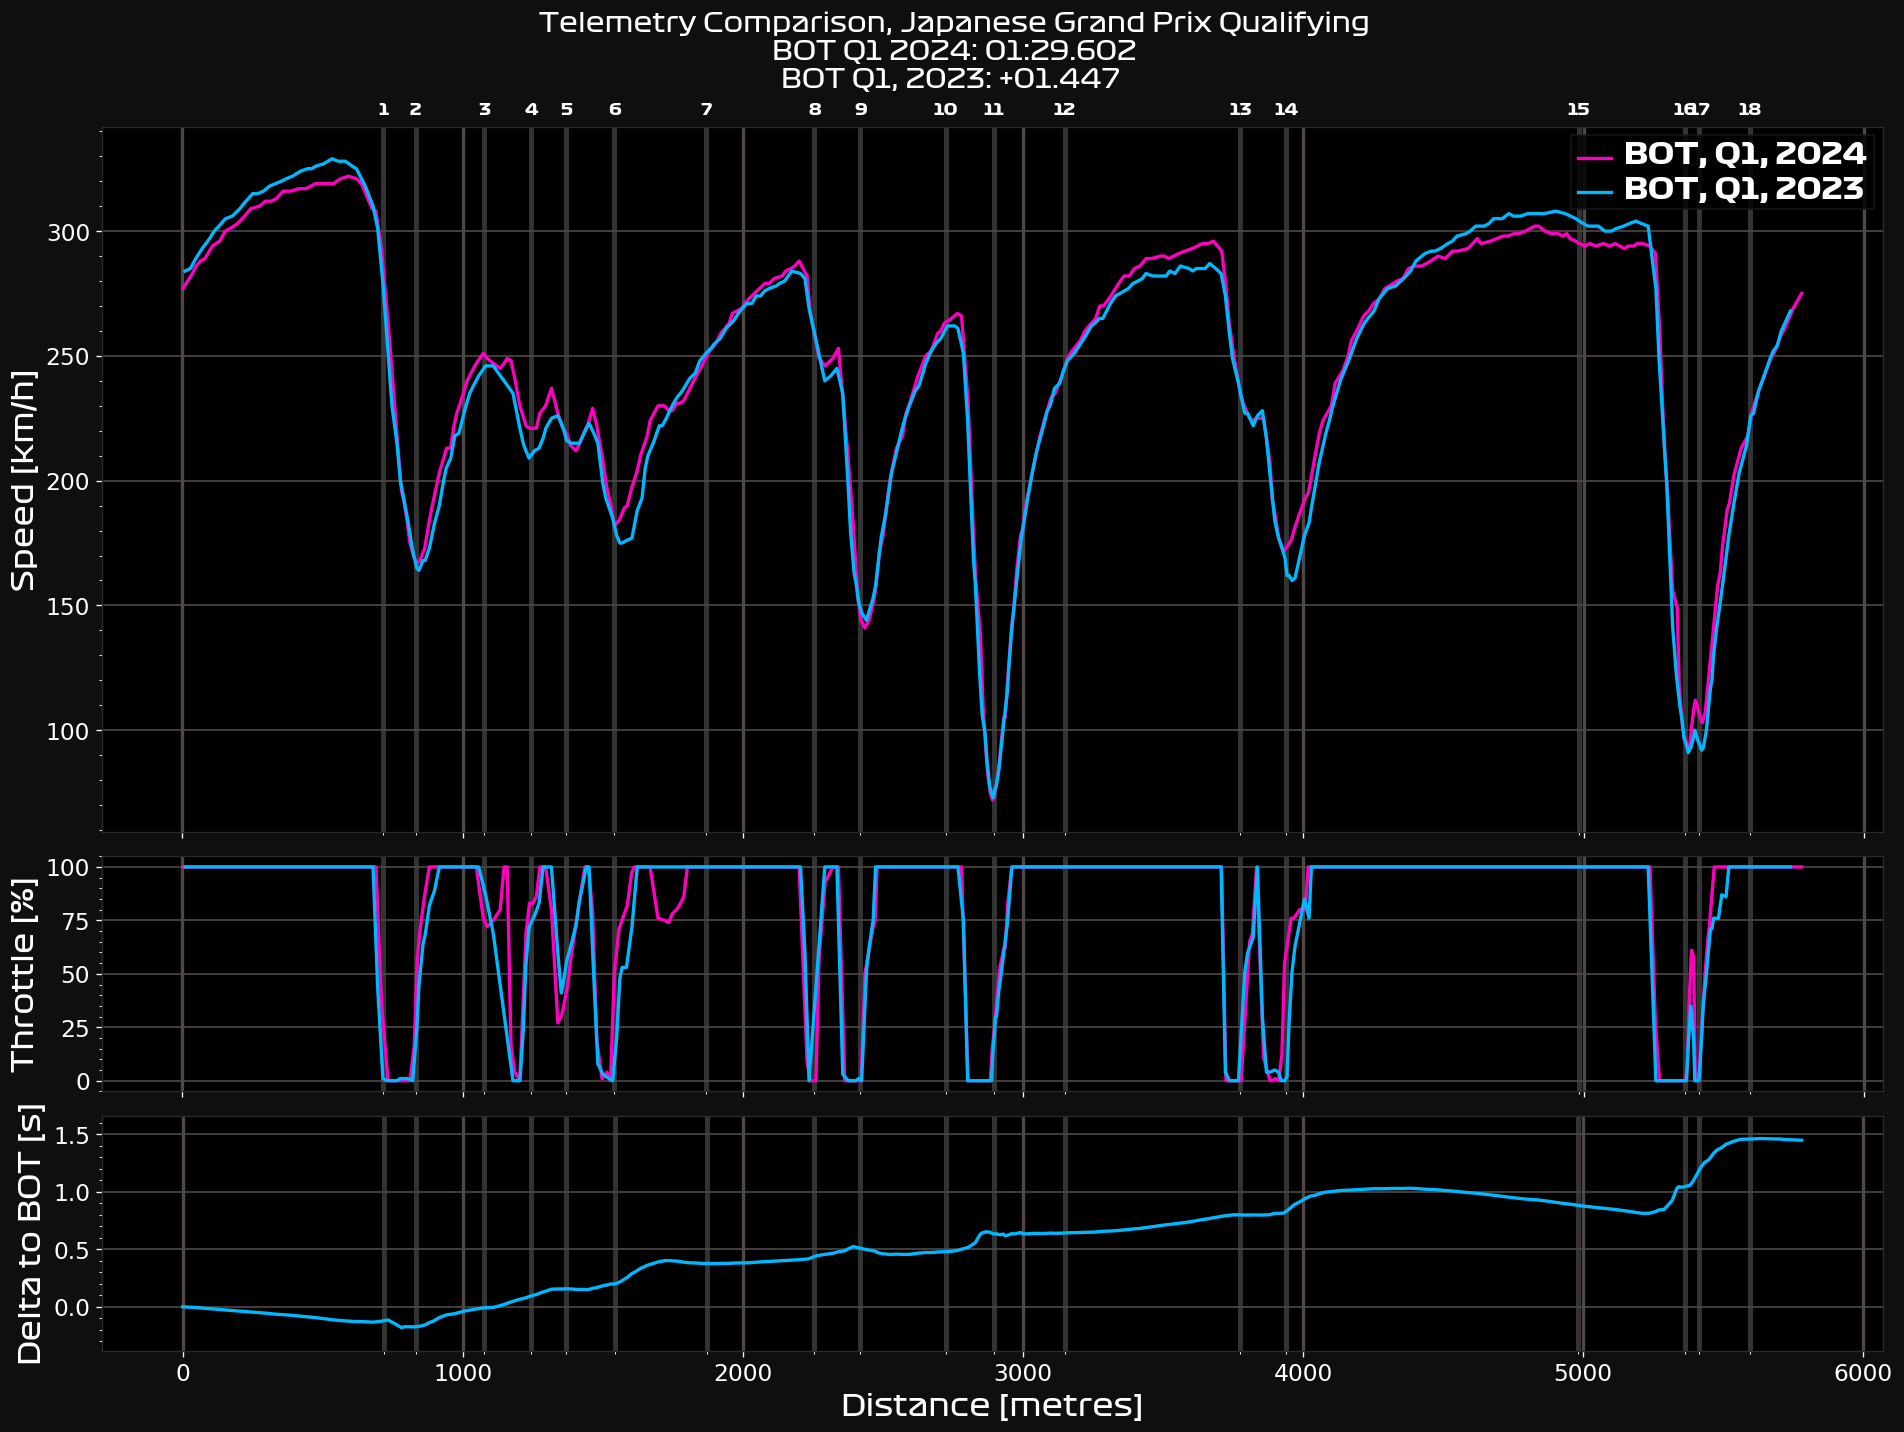

In [11]:
driver_info = [
    {
        "driver": "BOT",
        "session": "Q1",
        "data": DATA,
        "colour": "#ff00c1"
    },
    {
        "driver": "BOT",
        "session": "Q1",
        "data": DATA_2023,
        "colour": "#00b8ff"
    }
]

f1q.compare_telemetry_different_years(driver_info)

In [13]:
previous_year_comparison

,Team,LapTime2024,LapTime2023,Difference,Session2024,Session2023,SessionDifference
5,Aston Martin,0 days 00:01:28.686000,0 days 00:01:30.560000,1.874,q3,q3,0.0
6,Kick Sauber,0 days 00:01:29.593000,0 days 00:01:31.049000,1.456,q2,q1,1.0
7,Haas F1 Team,0 days 00:01:29.494000,0 days 00:01:30.665000,1.171,q2,q2,0.0
2,Mercedes,0 days 00:01:28.766000,0 days 00:01:29.908000,1.142,q3,q3,0.0
3,McLaren,0 days 00:01:28.489000,0 days 00:01:29.458000,0.969,q3,q3,0.0
4,RB,0 days 00:01:29.413000,0 days 00:01:30.303000,0.890,q3,q3,0.0
0,Ferrari,0 days 00:01:28.682000,0 days 00:01:29.542000,0.860,q3,q3,0.0
8,Williams,0 days 00:01:29.714000,0 days 00:01:30.537000,0.823,q2,q2,0.0
9,Alpine,0 days 00:01:29.816000,0 days 00:01:30.509000,0.693,q2,q2,0.0
1,Red Bull Racing,0 days 00:01:28.197000,0 days 00:01:28.877000,0.680,q3,q3,0.0


In [22]:
AUSTRALIA_2023 = f1.get_session(year=2023, gp="Australia", identifier=identifier)
AUSTRALIA_2023.load()

AUSTRALIA_2024 = f1.get_session(year=2024, gp="Australia", identifier=identifier)
AUSTRALIA_2024.load()

core           INFO 	Loading data for Australian Grand Prix - Qualifying [v3.3.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '63', '44', '14', '55', '18', '16', '23', '10', '27', '31', '22', '4', '20', '21', '81', '24', '2', '77', '11']
core           INFO 	Loading data for Australian Grand Prix - Qualifying [v3.3.0]
req            INFO 	Us

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
c:\Users\maxvo\AppData\Local\Programs\Python\Python312\Lib\site-packages\fastf1\utils.py:91: FutureWarning:

`utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.



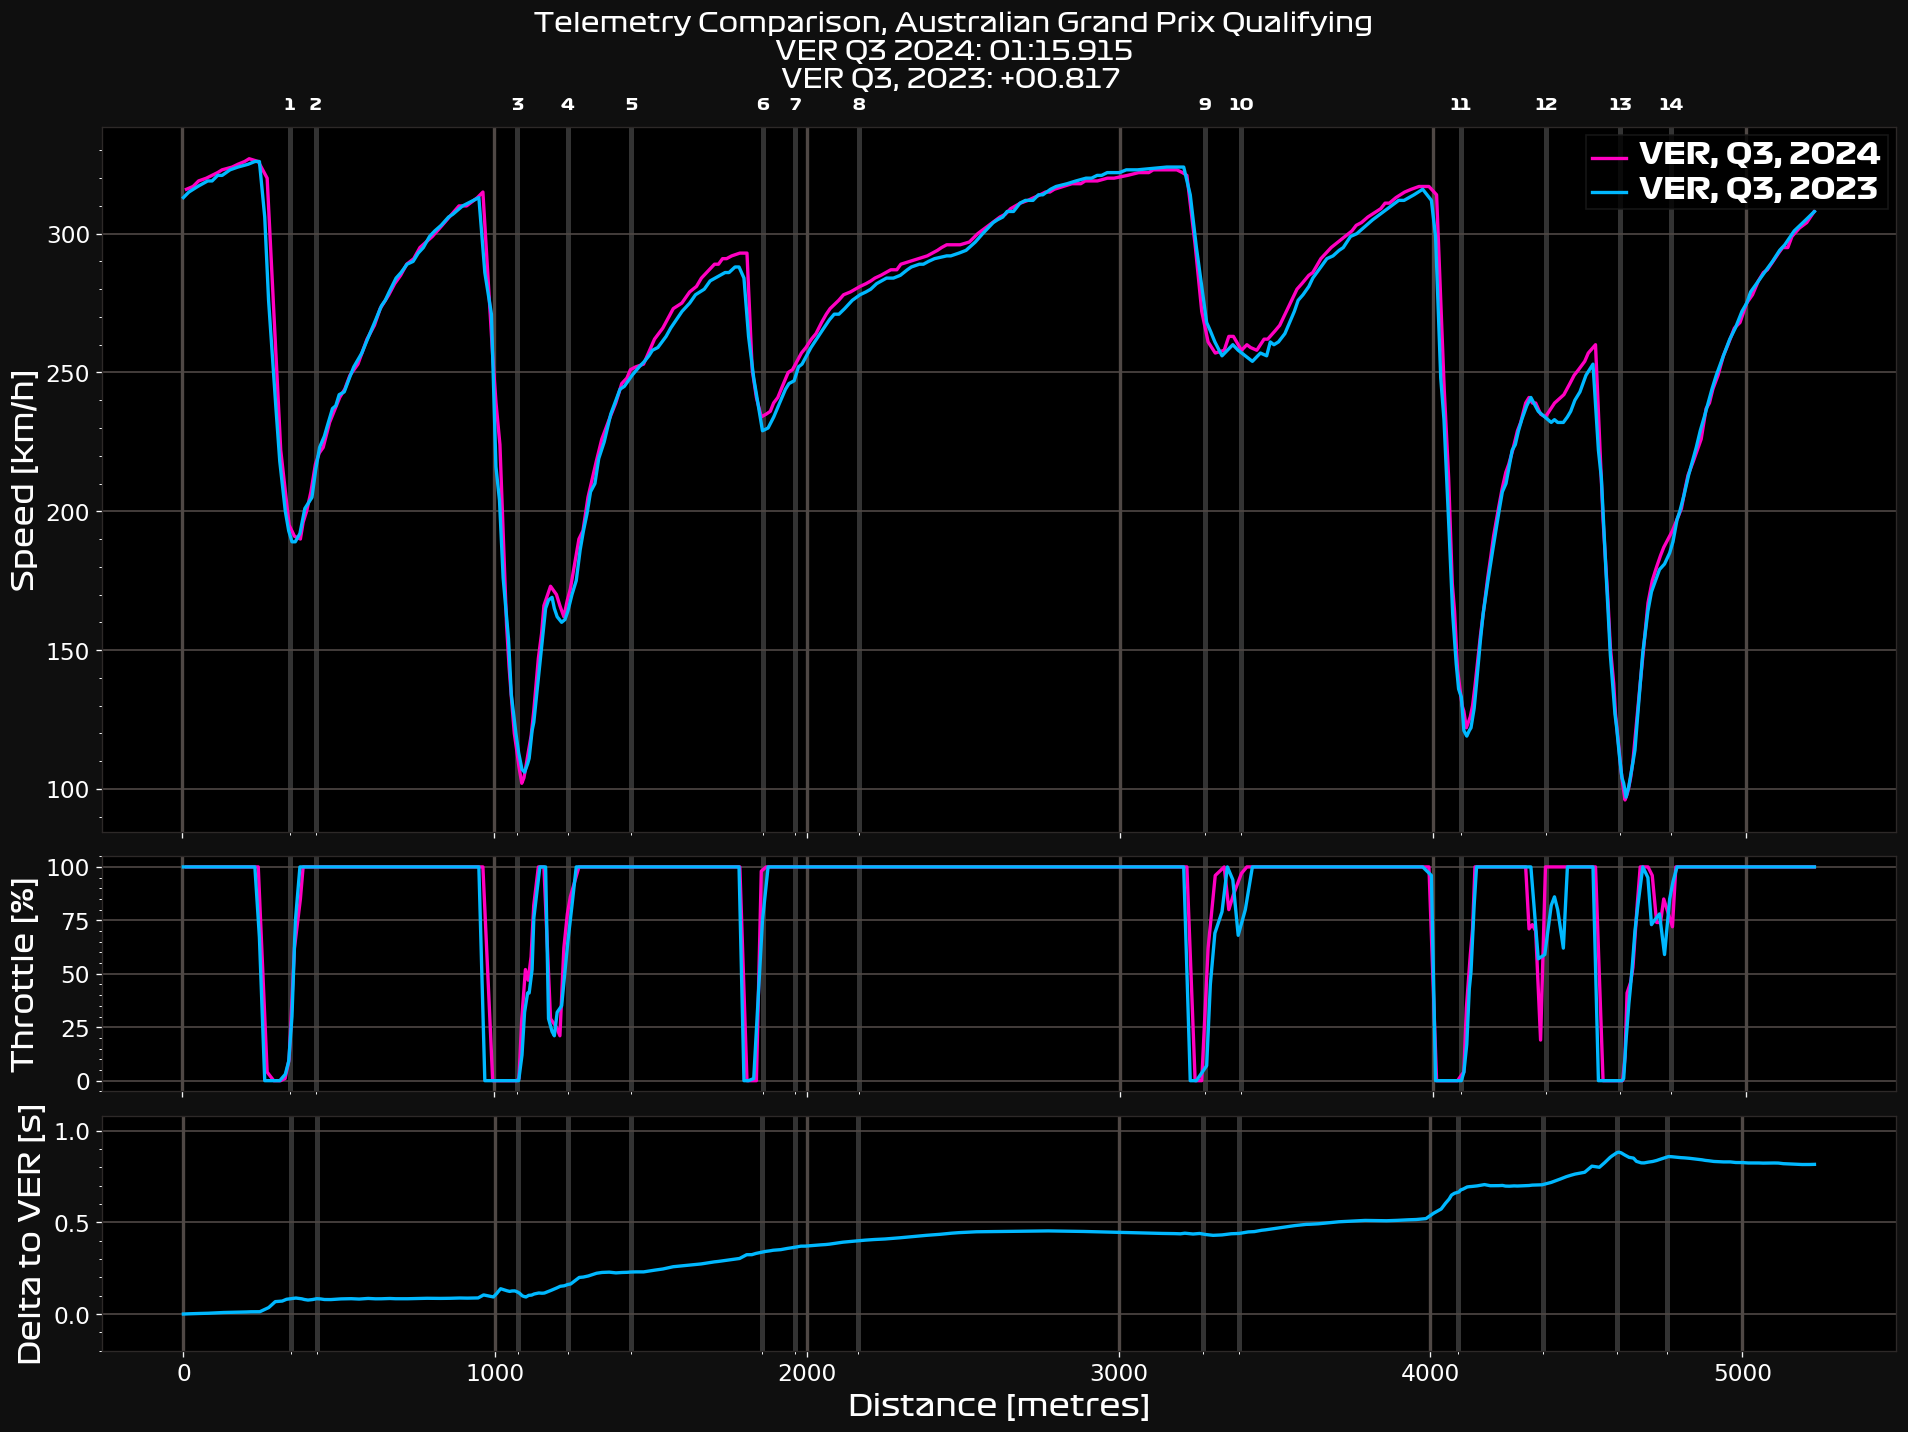

In [23]:
driver_info = [
    {
        "driver": "VER",
        "session": "Q3",
        "data": AUSTRALIA_2024,
        "colour": "#ff00c1"
    },
    {
        "driver": "VER",
        "session": "Q3",
        "data": AUSTRALIA_2023,
        "colour": "#00b8ff"
    }
]

f1q.compare_telemetry_different_years(driver_info)

In [24]:
BAHRAIN_2023 = f1.get_session(year=2023, gp="Bahrain", identifier=identifier)
BAHRAIN_2023.load()

BAHRAIN_2024 = f1.get_session(year=2024, gp="Bahrain", identifier=identifier)
BAHRAIN_2024.load()

core           INFO 	Loading data for Bahrain Grand Prix - Qualifying [v3.3.0]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 

c:\Users\maxvo\AppData\Local\Programs\Python\Python312\Lib\site-packages\fastf1\utils.py:91: FutureWarning:

`utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.



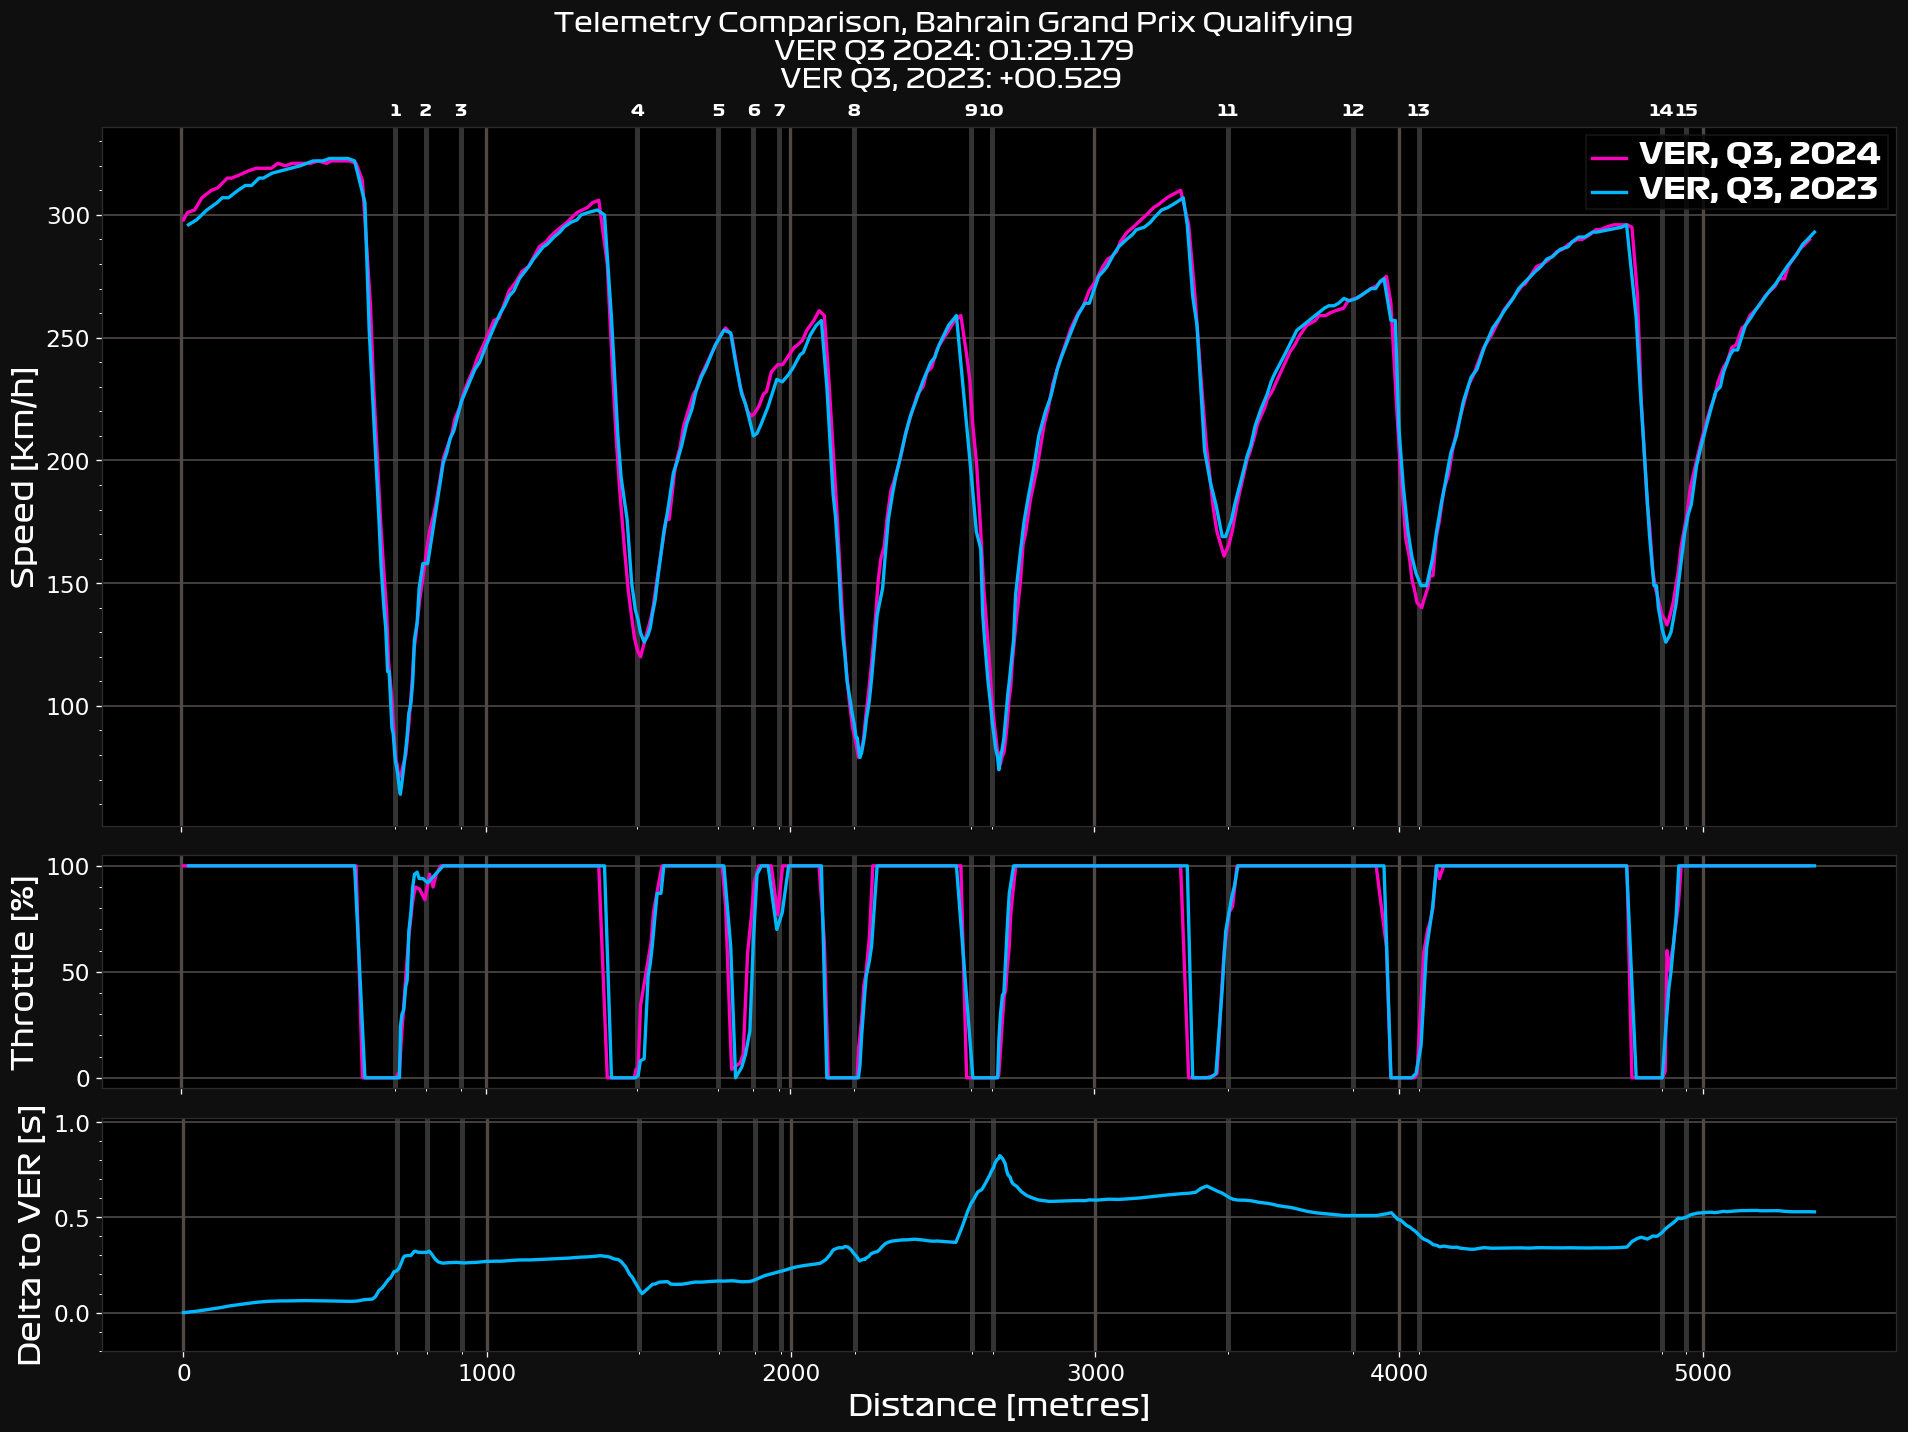

In [25]:
driver_info = [
    {
        "driver": "VER",
        "session": "Q3",
        "data": BAHRAIN_2024,
        "colour": "#ff00c1"
    },
    {
        "driver": "VER",
        "session": "Q3",
        "data": BAHRAIN_2023,
        "colour": "#00b8ff"
    }
]

f1q.compare_telemetry_different_years(driver_info)